In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import torch
from torchmetrics.classification import BinaryAccuracy
from sklearn.metrics import confusion_matrix
from torch import nn
from torch import optim
import time
import os
from torchinfo import summary

warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.shape

(766, 8)

In [4]:
df.describe(include='all')

,f1,f2,f3,f4,f5,f6,f7,target
count,766,766,766.000000,766,766,766,766,766.000000
unique,18,137,NaN,52,186,249,517,NaN
top,1,99,NaN,0,0,32,0.254,NaN
freq,134,17,NaN,226,372,13,6,NaN
mean,NaN,NaN,69.118799,NaN,NaN,NaN,NaN,0.349869
std,NaN,NaN,19.376901,NaN,NaN,NaN,NaN,0.477240
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,62.500000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [6]:
df.notna().sum()
# no NAN values

f1        766
f2        766
f3        766
f4        766
f5        766
f6        766
f7        766
target    766
dtype: int64

In [7]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
5,5,116,74,0,0,25.6,0.201,0
6,3,78,50,32,88,31,0.248,1
7,10,115,0,0,0,35.3,0.134,0
8,2,197,70,45,543,30.5,0.158,1
9,8,125,96,0,0,0,0.232,1


In [8]:
for col in df.columns:
    if col == 'target':
        continue
    print(df[col].unique())

['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65

In [9]:
for col in df.columns:
    if col == 'target':
        continue
    df[col] = df[col].apply(lambda x: np.nan if str(x).isalpha() else float(x))

In [10]:
print(df.notna().sum())
for col in df.columns:
    if col == 'target':
        continue
    df[col] = df[col].apply(lambda x : df[col].mean() if np.isnan(x) else x)

df['target'] = df['target'].apply(lambda x: float(x))

f1        765
f2        765
f3        766
f4        765
f5        765
f6        765
f7        765
target    766
dtype: int64


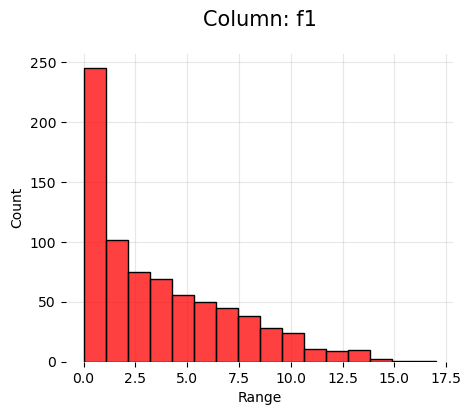

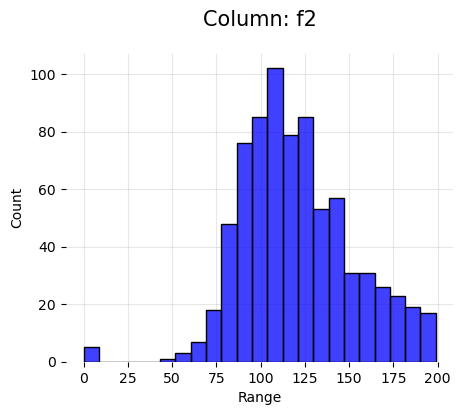

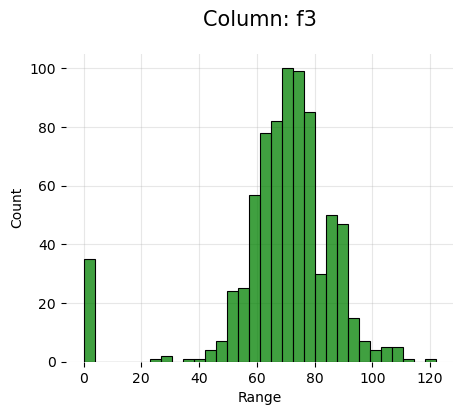

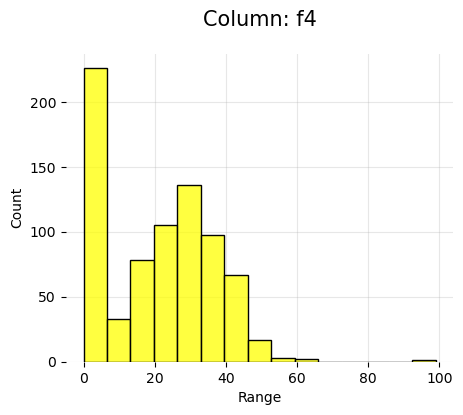

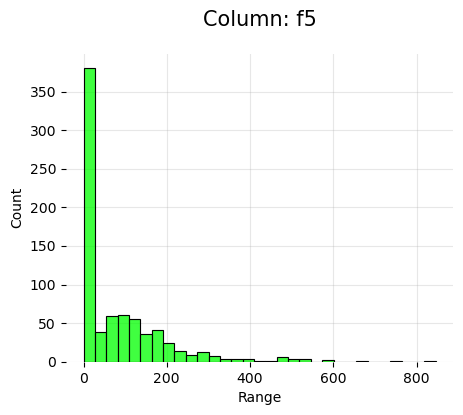

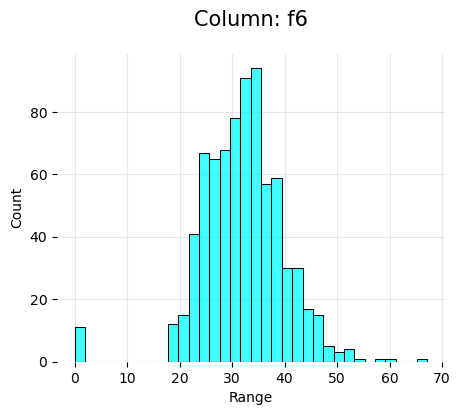

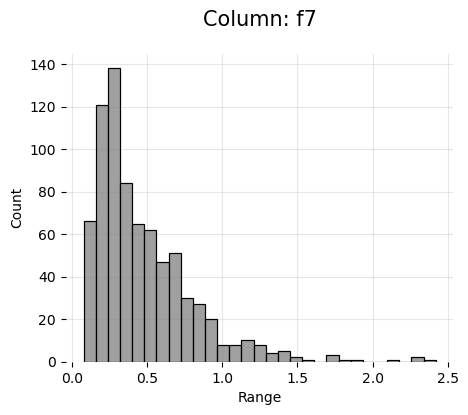

In [11]:
colourPalate = ['red','blue','green','yellow','lime','cyan','grey']
features = df.drop('target',axis=1)
j = 0
for col in features:
    plt.figure(figsize=(5,4))
    h=sns.histplot(features[col],color=colourPalate[j])
    j+=1
    h.set_axisbelow(True)
    for i in ['top', 'right','left','bottom']:
        side = h.spines[i]
        side.set_visible(False)
    plt.xlabel(xlabel="Range")
    plt.title(label='Column: '+col,pad=20,fontsize=15)
    plt.ylabel(ylabel='Count')
    plt.grid(alpha=0.3)
    plt.show()

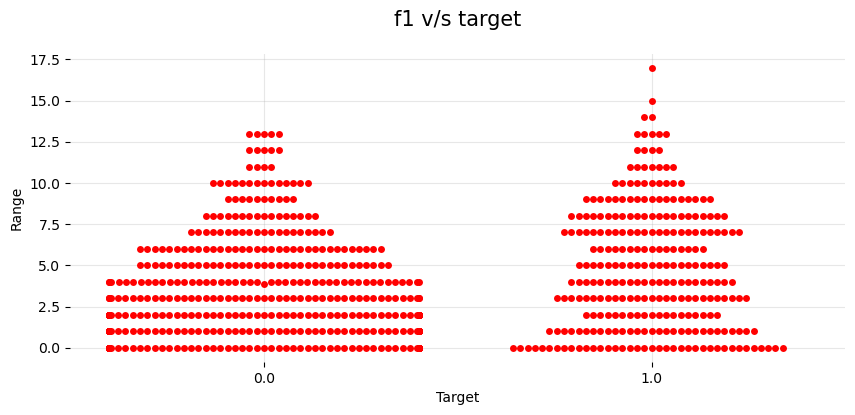

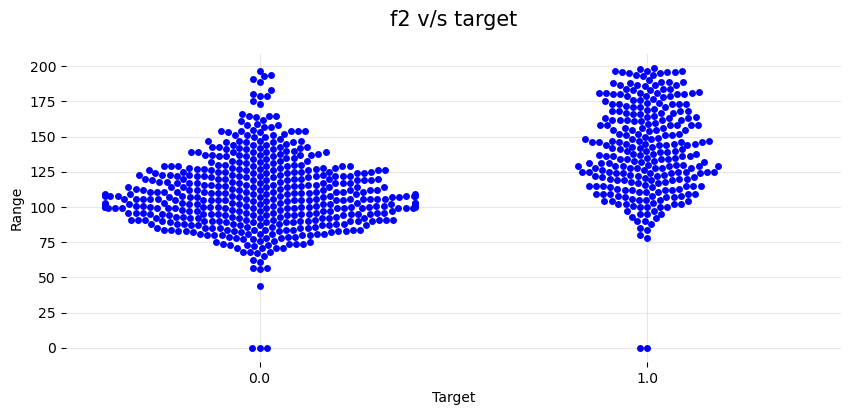

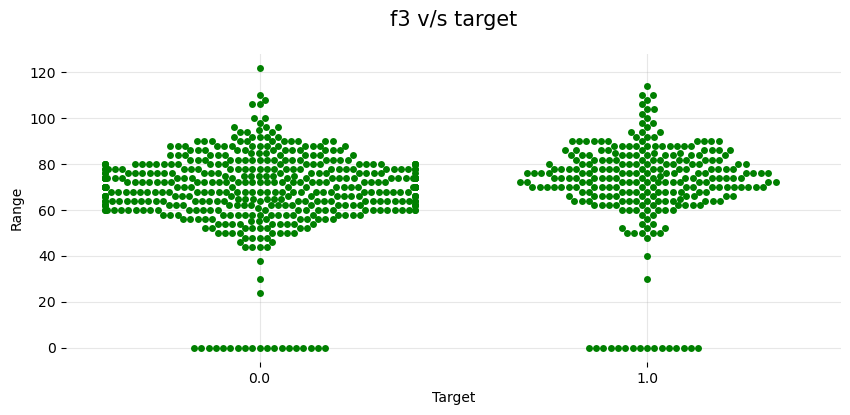

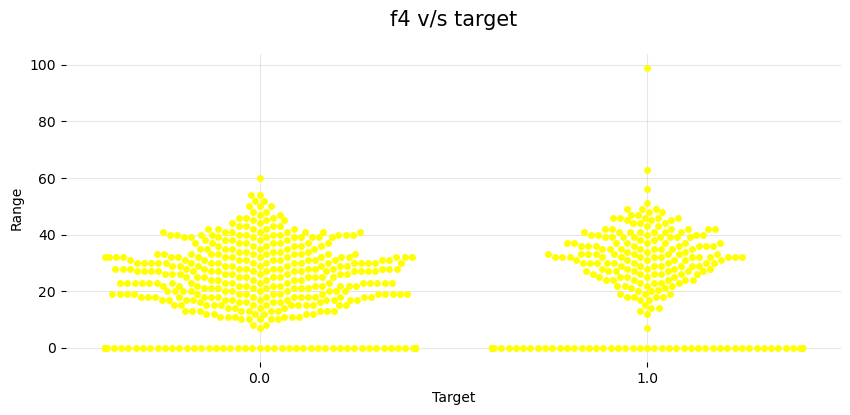

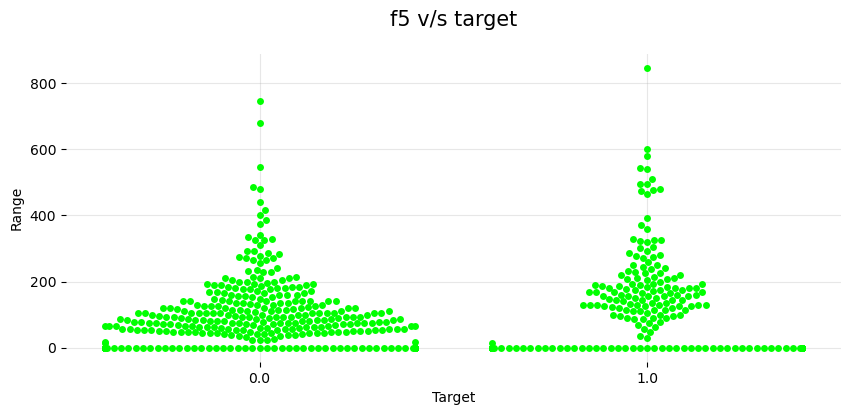

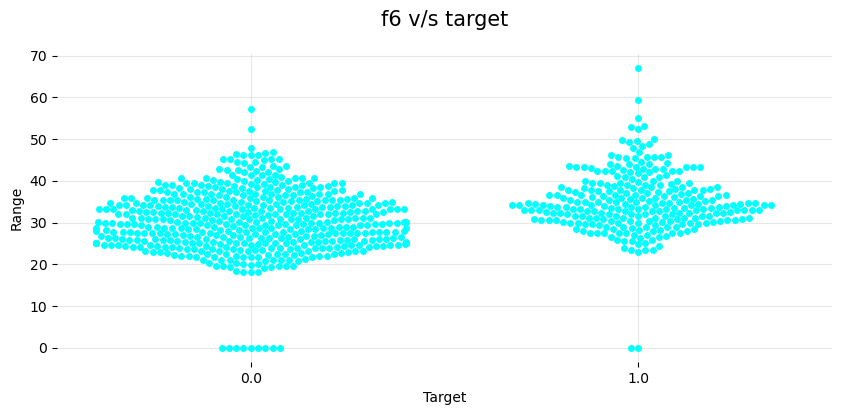

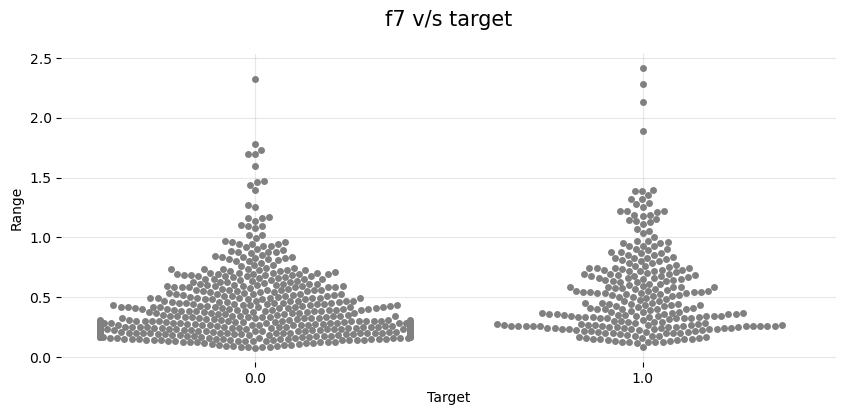

In [12]:
colourPalate = ['red','blue','green','yellow','lime','cyan','grey']
features = df.drop('target',axis=1)
target = df['target']
j = 0
for col in features:
    plt.figure(figsize=(10,4))
    h=sns.swarmplot(x=target,y=features[col],color=colourPalate[j])
    j+=1
    h.set_axisbelow(True)
    for i in ['top', 'right','left','bottom']:
        side = h.spines[i]
        side.set_visible(False)
    plt.xlabel(xlabel="Target")
    plt.title(label=col+' v/s target',pad=20,fontsize=15)
    plt.ylabel(ylabel='Range')
    plt.grid(alpha=0.3)
    plt.show()

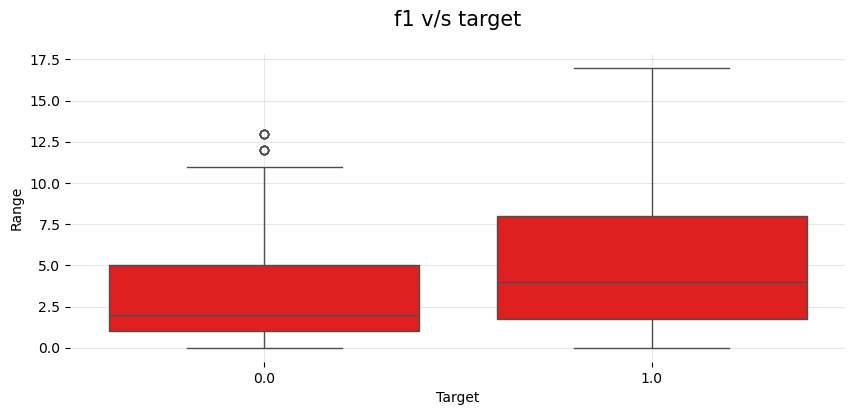

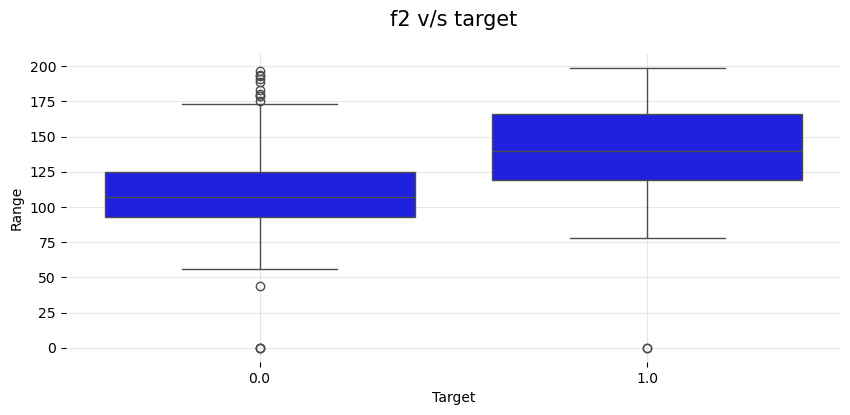

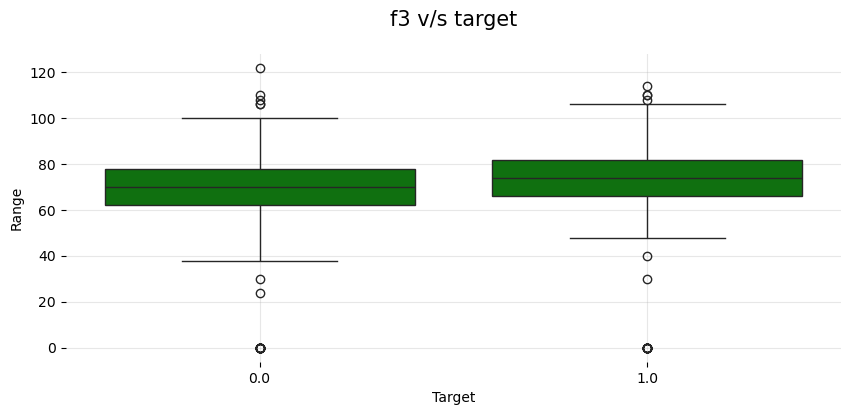

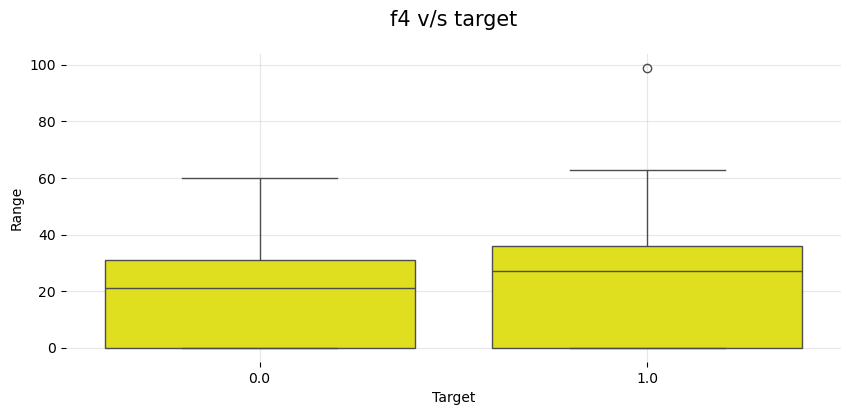

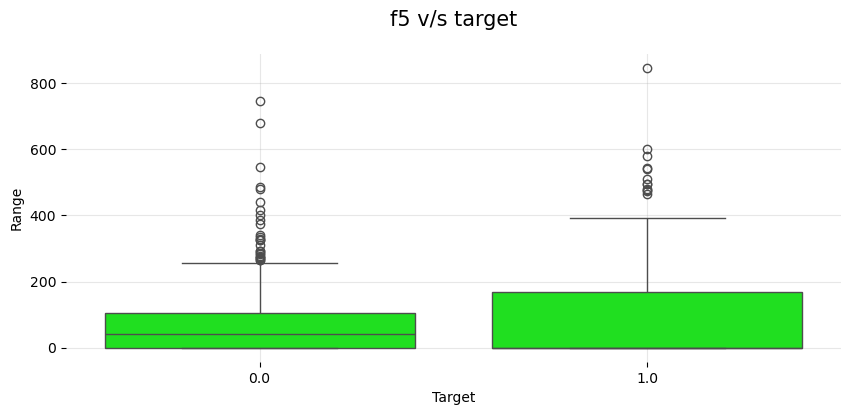

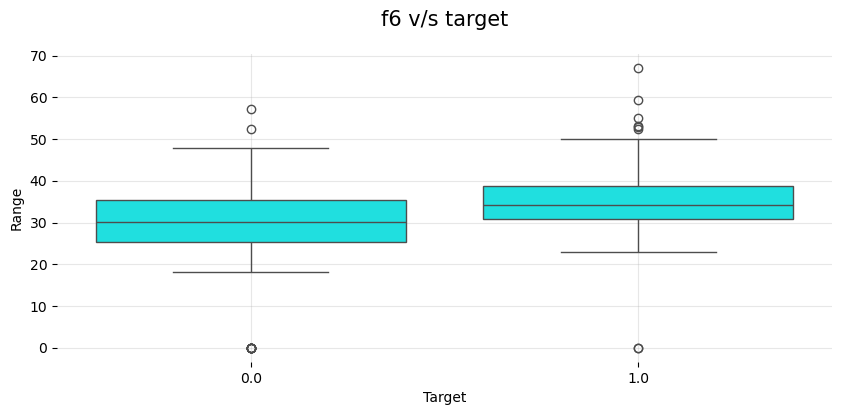

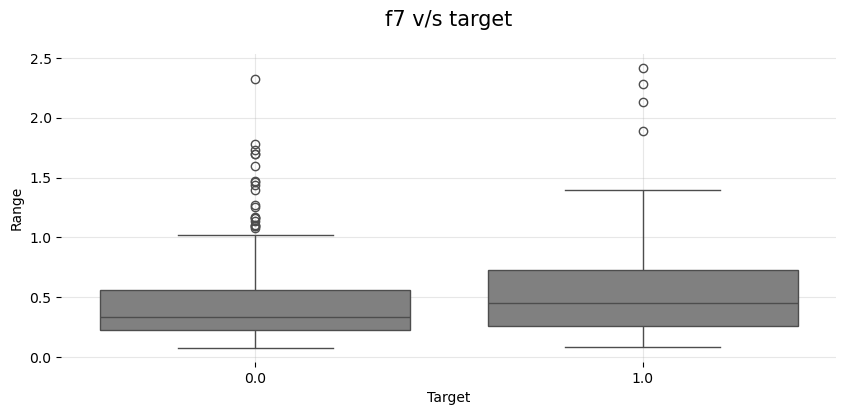

In [13]:
colourPalate = ['red','blue','green','yellow','lime','cyan','grey']
features = df.drop('target',axis=1)
target = df['target']
j = 0
for col in features:
    plt.figure(figsize=(10,4))
    h=sns.boxplot(x=target,y=features[col],color=colourPalate[j])
    j+=1
    h.set_axisbelow(True)
    for i in ['top', 'right','left','bottom']:
        side = h.spines[i]
        side.set_visible(False)
    plt.xlabel(xlabel="Target")
    plt.title(label=col+' v/s target',pad=20,fontsize=15)
    plt.ylabel(ylabel='Range')
    plt.grid(alpha=0.3)
    plt.show()

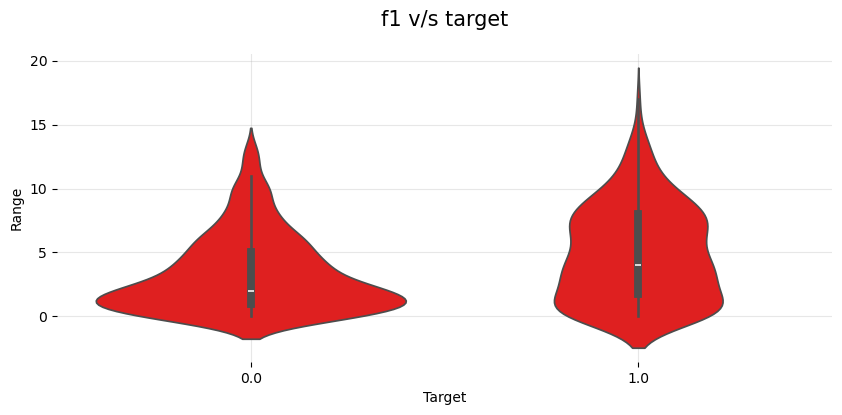

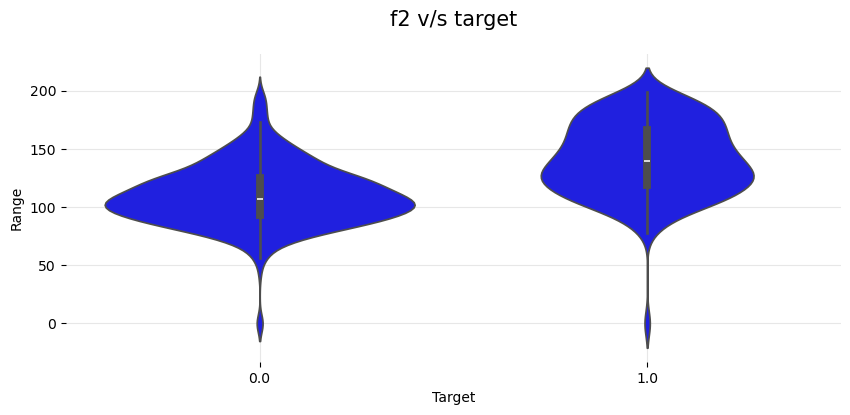

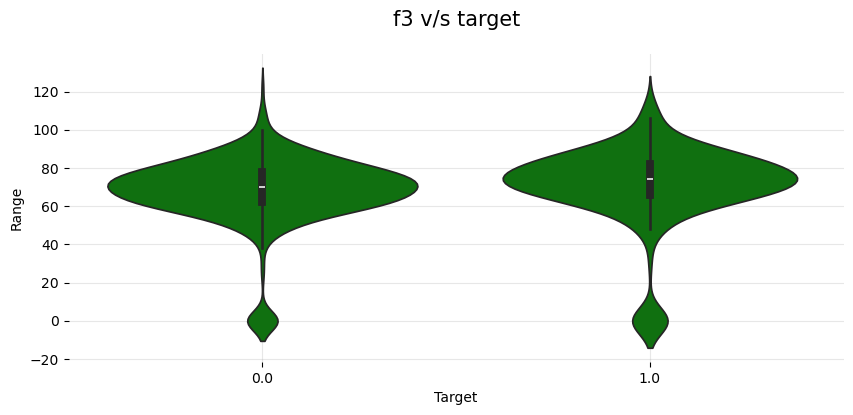

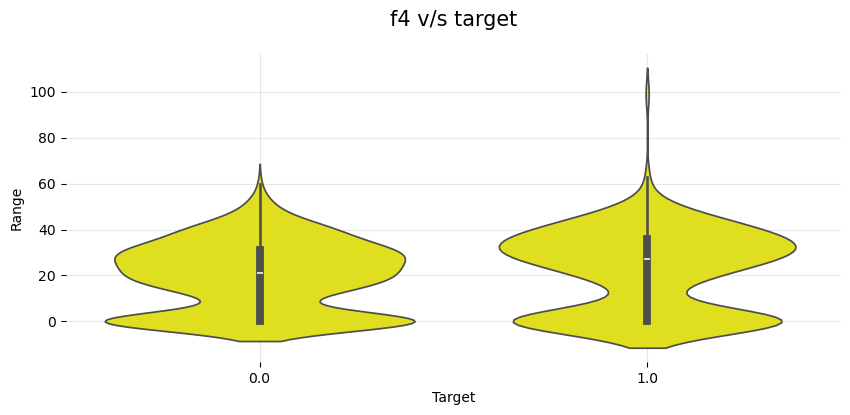

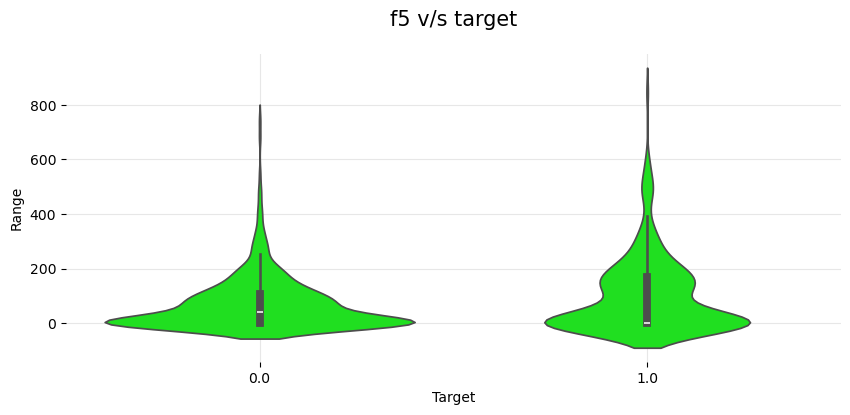

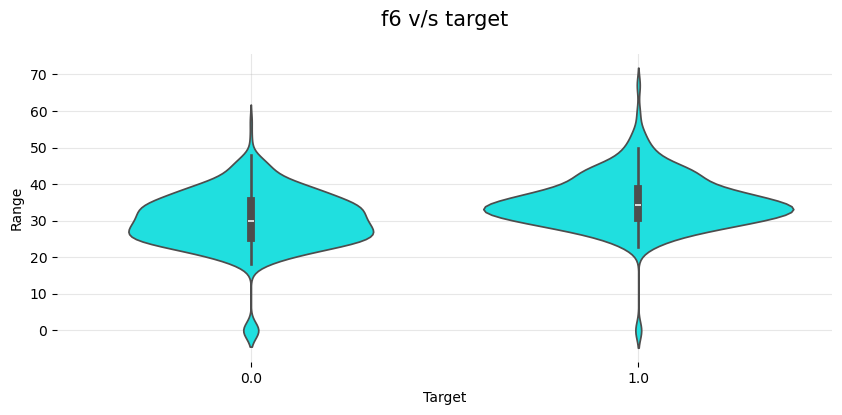

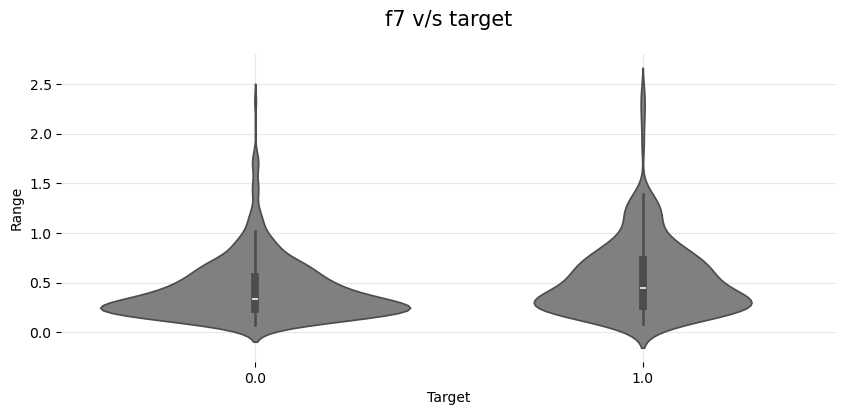

In [14]:
colourPalate = ['red','blue','green','yellow','lime','cyan','grey']
features = df.drop('target',axis=1)
target = df['target']
j = 0
for col in features:
    plt.figure(figsize=(10,4))
    h=sns.violinplot(x=target,y=features[col],color=colourPalate[j])
    j+=1
    h.set_axisbelow(True)
    for i in ['top', 'right','left','bottom']:
        side = h.spines[i]
        side.set_visible(False)
    plt.xlabel(xlabel="Target")
    plt.title(label=col+' v/s target',pad=20,fontsize=15)
    plt.ylabel(ylabel='Range')
    plt.grid(alpha=0.3)
    plt.show()

In [15]:
# Scalling The Data
scalar = StandardScaler()
scaledDFArray=scalar.fit_transform(df.drop('target',axis=1))
scaledDF = pd.DataFrame(scaledDFArray,columns=df.columns[:-1])
print(scaledDF.describe())

                 f1            f2            f3            f4            f5  \
count  7.660000e+02  7.660000e+02  7.660000e+02  7.660000e+02  7.660000e+02   
mean   1.345022e-16  5.472849e-16  3.061085e-16  1.321832e-16 -2.029128e-17   
std    1.000653e+00  1.000653e+00  1.000653e+00  1.000653e+00  1.000653e+00   
min   -1.142577e+00 -3.789538e+00 -3.569403e+00 -1.288765e+00 -6.950960e-01   
25%   -8.457789e-01 -6.866940e-01 -3.418051e-01 -1.288765e+00 -6.950960e-01   
50%   -2.521818e-01 -1.225405e-01  1.487897e-01  1.541762e-01 -3.826601e-01   
75%    6.382139e-01  5.983223e-01  5.619222e-01  7.188053e-01  4.136173e-01   
max    3.902998e+00  2.447492e+00  2.730868e+00  4.922156e+00  6.647146e+00   

                 f6            f7  
count  7.660000e+02  7.660000e+02  
mean   5.310518e-16  1.368212e-16  
std    1.000653e+00  1.000653e+00  
min   -4.056585e+00 -1.190319e+00  
25%   -5.956130e-01 -6.889769e-01  
50%    2.320075e-04 -2.948497e-01  
75%    5.833995e-01  4.632033e-01  


In [16]:
scaledDF['target']=df['target']
scaledDF.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,0.638214,0.849057,0.148790,0.907015,-0.695096,0.203073,0.467733,1.0
1,-0.845779,-1.125480,-0.161060,0.530596,-0.695096,-0.684356,-0.365823,0.0
2,1.231811,1.946022,-0.264343,-1.288765,-0.695096,-1.102715,0.603639,1.0
3,-0.845779,-1.000113,-0.161060,0.154176,0.120709,-0.494193,-0.921527,0.0
4,-1.142577,0.504297,-1.503740,0.907015,0.762938,1.407440,5.484172,1.0


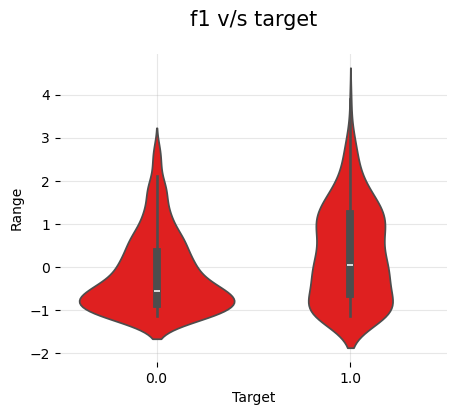

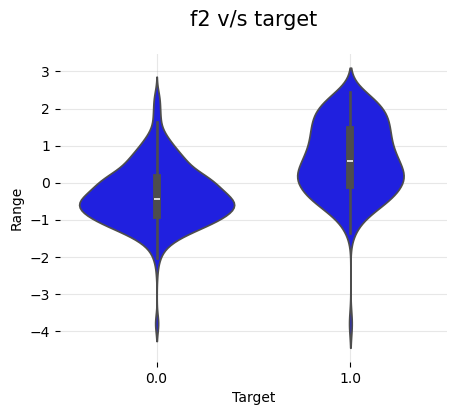

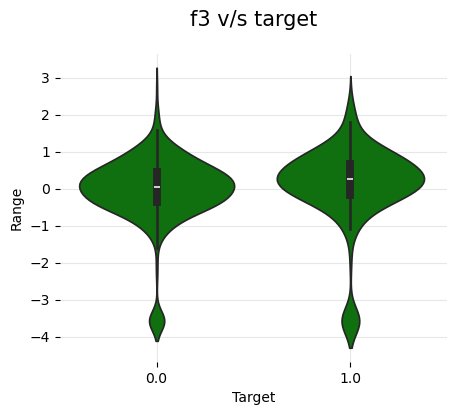

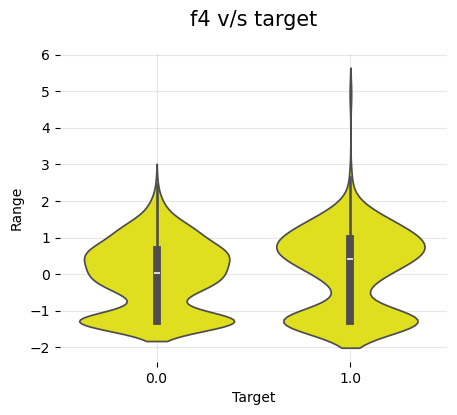

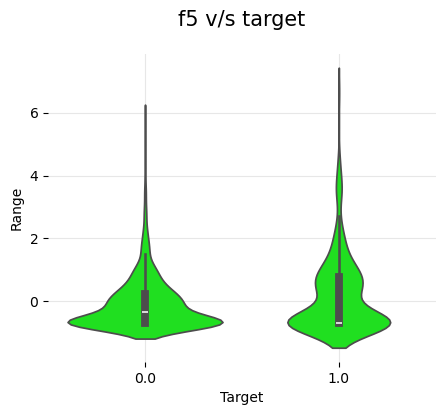

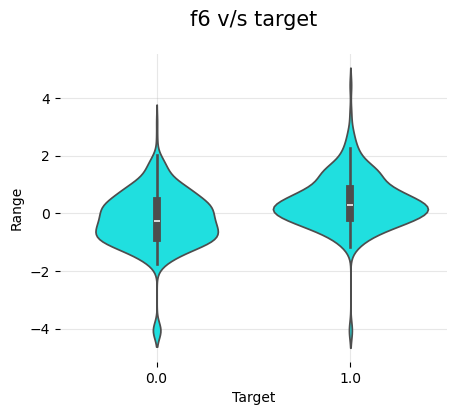

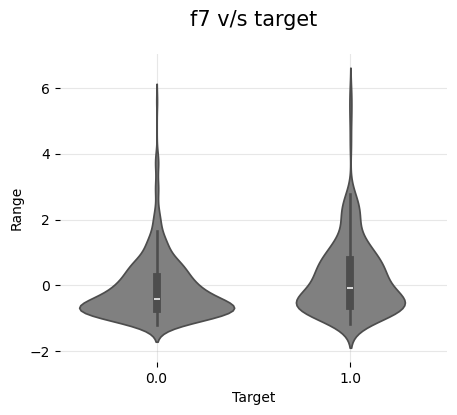

In [17]:
colourPalate = ['red','blue','green','yellow','lime','cyan','grey']
features = scaledDF.drop('target',axis=1)
target = scaledDF['target']
j = 0
for col in features:
    plt.figure(figsize=(5,4))
    h=sns.violinplot(x=target,y=features[col],color=colourPalate[j])
    j+=1
    h.set_axisbelow(True)
    for i in ['top', 'right','left','bottom']:
        side = h.spines[i]
        side.set_visible(False)
    plt.xlabel(xlabel="Target")
    plt.title(label=col+' v/s target',pad=20,fontsize=15)
    plt.ylabel(ylabel='Range')
    plt.grid(alpha=0.3)
    plt.show()

In [18]:
scaledDF['target'].value_counts()

target
0.0    498
1.0    268
Name: count, dtype: int64

In [19]:
# doing over-sampling
X = scaledDF.drop(columns=['target'])
y = scaledDF['target']
ros = RandomOverSampler(random_state=12)
resampledX, resampledY = ros.fit_resample(X, y)
resampledDF = pd.concat([pd.DataFrame(resampledX, columns=X.columns), pd.Series(resampledY, name='target')], axis=1)


In [20]:
resampledDF['target'].value_counts()

target
1.0    498
0.0    498
Name: count, dtype: int64

In [21]:
X = resampledDF.drop(columns=['target'])
y = resampledDF['target']

In [22]:
# pre-processed data
resampledDF.to_csv('pre-processed.csv',index=False)

In [ ]:
XV_train, X_test, yv_train, y_test = train_test_split(X,y,random_state=122,test_size=0.1)

In [23]:
X_train , X_validation , y_train , y_validation = train_test_split(XV_train,yv_train,random_state=122,test_size=0.1)

In [24]:
print(X_train.shape,X_test.shape,X_validation.shape,y_validation.shape,y_train.shape,y_test.shape)

(806, 7) (100, 7) (90, 7) (90,) (806,) (100,)


In [25]:
# Training NN

In [26]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [27]:
# To Tensor
X_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32).to(device)
X_validation_tensor = torch.tensor(np.array(X_validation), dtype=torch.float32).to(device)
y_validation_tensor = torch.tensor(np.array(y_validation), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(np.array(X_test), dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).to(device)

In [28]:
# Neural Training
'''
INPUT NEURONS - 7
OUTPUT NEURONS - 1
ACTIVATION FUNCTION for HIDDEN LAYER - ReLU
ACTIVATION FUNCTION for OUTPUT LAYER - Sigmoid / BCEWithLogitsLoss
NO. OF HIDDEN LAYERS - 4
DROPOUT - Y


'''

'\nINPUT NEURONS - 7\nOUTPUT NEURONS - 1\nACTIVATION FUNCTION for HIDDEN LAYER - ReLU\nACTIVATION FUNCTION for OUTPUT LAYER - Sigmoid / BCEWithLogitsLoss\nNO. OF HIDDEN LAYERS - 4\nSIZE OF HIDDEN LAYER - 256,128,64,32\nDROPOUT - Y\n\n\n'

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, inputNeuron):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(inputNeuron, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)


In [36]:
size = X_train.shape[1]
model = NeuralNetwork(size).to(device)
print(model)
summary(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.3, inplace=False)
    (5): Linear(in_features=128, out_features=64, bias=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)


Layer (type:depth-idx)                   Param #
NeuralNetwork                            --
├─Flatten: 1-1                           --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       2,048
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       32,896
│    └─ReLU: 2-4                         --
│    └─Dropout: 2-5                      --
│    └─Linear: 2-6                       8,256
│    └─ReLU: 2-7                         --
│    └─Linear: 2-8                       2,080
│    └─ReLU: 2-9                         --
│    └─Linear: 2-10                      33
Total params: 45,313
Trainable params: 45,313
Non-trainable params: 0

In [31]:
lossFunction = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-5)

In [32]:
def binary_accuracy(pred,act):
    BC = BinaryAccuracy().to(device)
    BC.reset()
    return BC(pred,act)


In [ ]:
numEpochs = 500
trainAccuracyArray = []
validationAccuracyArray = []
testAccuracy = 0.0 
bestValidationAccuracy = 0.0

start_time = time.time()

for epoch in range(numEpochs):
    model.train()
    
    outputs = model(X_train_tensor).to(device)
    
    loss = lossFunction(outputs.squeeze(), y_train_tensor) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():

        val_outputs = model(X_validation_tensor)
        val_loss = lossFunction(val_outputs.squeeze(), y_validation_tensor)
    
        trainAccuracy = binary_accuracy(outputs.squeeze(), y_train_tensor.float())
        trainAccuracyArray.append(trainAccuracy.item())
        validationAccuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)  
        validationAccuracyArray.append(validationAccuracy.item())
        print(f'Epoch [{epoch+1}/{numEpochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {validationAccuracy*100:.2f}%')


        if validationAccuracy.item()>bestValidationAccuracy:
            bestValidationAccuracy = validationAccuracy.item()
            if os.path.exists("eda_nn.pt"):
                os.remove("eda_nn.pt")
            torch.save(model.state_dict(), f"eda_nn.pt")
            print(f'Saving model at epoch {epoch+1} with validation accuracy {bestValidationAccuracy:.4f}')


end_time = time.time()
total_time = end_time - start_time
print(f"Training completed in {total_time:.2f} seconds.")


model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    testAccuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)  
    print(f"Accuracy on Test- {testAccuracy*100:.2f}%")

test_accuracies = [testAccuracy.item()] * numEpochs


Epoch [1/500], Loss: 0.6970, Validation Loss: 0.6743, Validation Accuracy: 44.44%
Saving best model at epoch 1 with validation accuracy 0.4444
Epoch [2/500], Loss: 0.6768, Validation Loss: 0.6312, Validation Accuracy: 68.89%
Saving best model at epoch 2 with validation accuracy 0.6889
Epoch [3/500], Loss: 0.6122, Validation Loss: 0.6157, Validation Accuracy: 64.44%
Epoch [4/500], Loss: 0.5573, Validation Loss: 0.6845, Validation Accuracy: 58.89%
Epoch [5/500], Loss: 0.5947, Validation Loss: 0.6040, Validation Accuracy: 67.78%
Epoch [6/500], Loss: 0.5306, Validation Loss: 0.6064, Validation Accuracy: 67.78%
Epoch [7/500], Loss: 0.5355, Validation Loss: 0.5969, Validation Accuracy: 70.00%
Saving best model at epoch 7 with validation accuracy 0.7000
Epoch [8/500], Loss: 0.4972, Validation Loss: 0.6167, Validation Accuracy: 66.67%
Epoch [9/500], Loss: 0.4989, Validation Loss: 0.6022, Validation Accuracy: 65.56%
Epoch [10/500], Loss: 0.4969, Validation Loss: 0.5744, Validation Accuracy: 66.

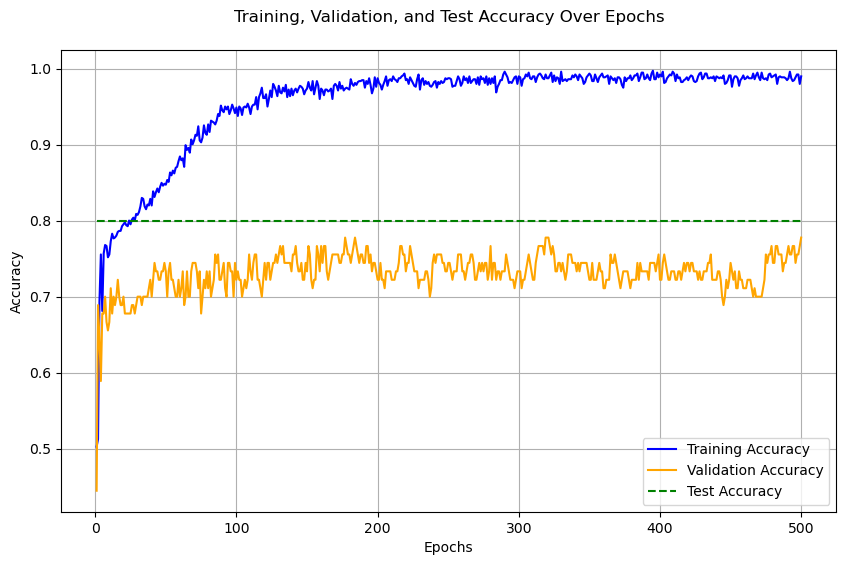

In [34]:
epochs = np.arange(1, numEpochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs[:len(trainAccuracyArray)], trainAccuracyArray, label='Training Accuracy', color='blue')
plt.plot(epochs[:len(validationAccuracyArray)], validationAccuracyArray, label='Validation Accuracy', color='orange')
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green', linestyle='--')
plt.title('Training, Validation, and Test Accuracy Over Epochs',pad=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


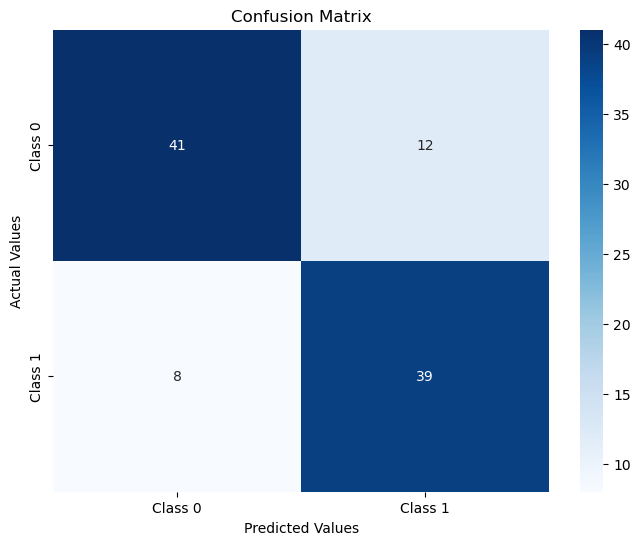

In [35]:

cm = confusion_matrix(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
